# In this Notebook, We will Predict stock price of Apples using LSTM

## Import Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read Dataset

In [2]:
Dataset = pd.read_csv('Datasets/apple_prices.csv')
Dataset

,590.140015
0,572.800049
1,525.339966
2,521.900024
3,528.020020
4,539.230042
5,538.420044
6,527.699951
7,528.360046
8,523.419983
9,523.150024


In [3]:
values = Dataset.values
print(values)
values.shape

[[572.800049]
 [525.339966]
 [521.900024]
 [528.02002 ]
 [539.230042]
 [538.420044]
 [527.699951]
 [528.360046]
 [523.419983]
 [523.150024]
 [546.      ]
 [518.659973]
 [502.610016]
 [550.070007]
 [540.98999 ]
 [529.910034]
 [537.450012]
 [557.460022]
 [568.      ]
 [555.02002 ]
 [560.900024]
 [558.      ]
 [521.02002 ]
 [524.98999 ]
 [519.98999 ]
 [521.099976]
 [529.039978]
 [511.77002 ]
 [489.830017]
 [486.559967]
 [477.25    ]
 [496.100006]
 [460.999969]
 [505.000031]
 [493.099976]
 [500.75    ]
 [504.339966]
 [456.860016]
 [464.690002]
 [440.799988]
 [429.459991]
 [425.01001 ]
 [420.109985]
 [402.690002]
 [407.399994]
 [431.440002]
 [444.72998 ]
 [450.72998 ]
 [449.900024]
 [431.910004]
 [451.509979]
 [455.709961]
 [420.450012]
 [392.639984]
 [427.      ]
 [424.849976]
 [441.899994]
 [464.690002]
 [441.450012]
 [429.75    ]
 [427.799988]
 [453.850006]
 [461.100006]
 [476.5     ]
 [453.909973]
 [437.829987]
 [504.559998]
 [502.680023]
 [522.      ]
 [510.529968]
 [520.350037]
 [508.

(137, 1)

In [4]:
#values = values.reshape((len(values), 1))
#print(values)
#values.shape

### Standardise and Normalize the data

In [5]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 509.714599, StandardDeviation: 78.980171


In [6]:
# standardization the dataset and print the rows
normalized_dataset = scaler.transform(values)
for i in range(len(Dataset)):
    print(normalized_dataset[i])


[0.79875049]
[0.19783911]
[0.15428461]
[0.23177237]
[0.373707]
[0.36345129]
[0.22771984]
[0.23607757]
[0.17352943]
[0.17011137]
[0.45942419]
[0.11326101]
[-0.08995401]
[0.5109562]
[0.39599042]
[0.2557026]
[0.35116932]
[0.60452418]
[0.73797512]
[0.57363032]
[0.64807944]
[0.61136106]
[0.14314252]
[0.19340793]
[0.1301009]
[0.14415488]
[0.24468647]
[0.02602452]
[-0.25176676]
[-0.29317019]
[-0.41104746]
[-0.17237989]
[-0.6167957]
[-0.05969306]
[-0.21036448]
[-0.11350443]
[-0.06805041]
[-0.66921333]
[-0.57007469]
[-0.87255586]
[-1.01613616]
[-1.07247918]
[-1.13452038]
[-1.35508186]
[-1.29544674]
[-0.99106644]
[-0.82279663]
[-0.7468282]
[-0.75733661]
[-0.98511555]
[-0.73695231]
[-0.68377464]
[-1.13021516]
[-1.48232921]
[-1.04728311]
[-1.07450543]
[-0.85862824]
[-0.57007469]
[-0.86432564]
[-1.01246424]
[-1.03715413]
[-0.70732428]
[-0.61552909]
[-0.42054352]
[-0.70656502]
[-0.91016025]
[-0.06526449]
[-0.08906762]
[0.15555045]
[0.01032372]
[0.1346596]
[-0.00993421]
[0.19353467]
[1.06274048]
[0.8

In [7]:
# inverse transform and print the rows
#inversed_dataset = scaler.inverse_transform(normalized_dataset)
#for i in range(len(Dataset)):
    #print(inversed_dataset[i])

### Plot the Normalized the data

Text(0,0.5,'normalized series value')

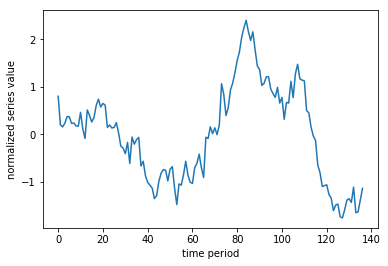

In [8]:
# lets take a look at our time series
Scaled_dataset = normalized_dataset
plt.plot(Scaled_dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

### Define function for Window size for the data and return X and Y

In [9]:
def window_size_transforms(Series, Window_size):
    X=[]
    Y=[]
    for item in range(0,len(Series)-Window_size):
        X.append(Series[item:item+Window_size])
        Y.append(Series[item+Window_size])
    
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    Y = np.asarray(Y)
    Y.shape = (len(Y),1)

    return X,Y

In [10]:
window_size = 5
X,Y =window_size_transforms(Scaled_dataset,window_size)
print(window_size_transforms(Scaled_dataset,window_size))


(array([[ 0.79875049,  0.19783911,  0.15428461,  0.23177237,  0.373707  ],
       [ 0.19783911,  0.15428461,  0.23177237,  0.373707  ,  0.36345129],
       [ 0.15428461,  0.23177237,  0.373707  ,  0.36345129,  0.22771984],
       [ 0.23177237,  0.373707  ,  0.36345129,  0.22771984,  0.23607757],
       [ 0.373707  ,  0.36345129,  0.22771984,  0.23607757,  0.17352943],
       [ 0.36345129,  0.22771984,  0.23607757,  0.17352943,  0.17011137],
       [ 0.22771984,  0.23607757,  0.17352943,  0.17011137,  0.45942419],
       [ 0.23607757,  0.17352943,  0.17011137,  0.45942419,  0.11326101],
       [ 0.17352943,  0.17011137,  0.45942419,  0.11326101, -0.08995401],
       [ 0.17011137,  0.45942419,  0.11326101, -0.08995401,  0.5109562 ],
       [ 0.45942419,  0.11326101, -0.08995401,  0.5109562 ,  0.39599042],
       [ 0.11326101, -0.08995401,  0.5109562 ,  0.39599042,  0.2557026 ],
       [-0.08995401,  0.5109562 ,  0.39599042,  0.2557026 ,  0.35116932],
       [ 0.5109562 ,  0.39599042,  0.

### Split the Dataset into Train and Test Dataset

In [11]:


train_test_split = int(np.ceil(2*len(Y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
Y_train = Y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
Y_test = Y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

### Import Libraries for LSTM Neural Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import keras

Using TensorFlow backend.


### Define the Model

In [13]:
Classifier = Sequential()
Classifier.add(LSTM(5,input_shape = (window_size,1)))
Classifier.add(Dense(1))

### Define the Optimizer

In [14]:
optimizer = keras.optimizers.RMSprop()

### Compile and Fit the Model

In [15]:
Classifier.compile(optimizer=optimizer,loss='mean_squared_error')

In [16]:
Classifier.fit(X_train,Y_train,batch_size=50,epochs=1500)

Epoch 1/1500
88/88 [==============================] - 4s 46ms/step - loss: 0.9586
Epoch 2/1500
88/88 [==============================] - 0s 768us/step - loss: 0.9390
Epoch 3/1500
88/88 [==============================] - 0s 742us/step - loss: 0.9263
Epoch 4/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.9155
Epoch 5/1500
88/88 [==============================] - 0s 727us/step - loss: 0.9059
Epoch 6/1500
88/88 [==============================] - 0s 676us/step - loss: 0.8967
Epoch 7/1500
88/88 [==============================] - 0s 637us/step - loss: 0.8881
Epoch 8/1500
88/88 [==============================] - 0s 762us/step - loss: 0.8801
Epoch 9/1500
88/88 [==============================] - 0s 673us/step - loss: 0.8720
Epoch 10/1500
88/88 [==============================] - 0s 805us/step - loss: 0.8642
Epoch 11/1500
88/88 [==============================] - 0s 887us/step - loss: 0.8574
Epoch 12/1500
88/88 [==============================] - 0s 640us/step - loss: 0.8495
Epoc

88/88 [==============================] - 0s 619us/step - loss: 0.1109
Epoch 195/1500
88/88 [==============================] - 0s 624us/step - loss: 0.1105
Epoch 196/1500
88/88 [==============================] - 0s 648us/step - loss: 0.1102
Epoch 197/1500
88/88 [==============================] - 0s 777us/step - loss: 0.1101
Epoch 198/1500
88/88 [==============================] - 0s 768us/step - loss: 0.1102
Epoch 199/1500
88/88 [==============================] - 0s 804us/step - loss: 0.1096
Epoch 200/1500
88/88 [==============================] - 0s 717us/step - loss: 0.1093
Epoch 201/1500
88/88 [==============================] - 0s 747us/step - loss: 0.1091
Epoch 202/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 203/1500
88/88 [==============================] - 0s 763us/step - loss: 0.1088
Epoch 204/1500
88/88 [==============================] - 0s 691us/step - loss: 0.1082
Epoch 205/1500
88/88 [==============================] - 0s 746us/step - loss: 0.10

88/88 [==============================] - 0s 635us/step - loss: 0.0774
Epoch 387/1500
88/88 [==============================] - 0s 592us/step - loss: 0.0778
Epoch 388/1500
88/88 [==============================] - 0s 644us/step - loss: 0.0771
Epoch 389/1500
88/88 [==============================] - 0s 640us/step - loss: 0.0775
Epoch 390/1500
88/88 [==============================] - 0s 755us/step - loss: 0.0772
Epoch 391/1500
88/88 [==============================] - 0s 745us/step - loss: 0.0772
Epoch 392/1500
88/88 [==============================] - 0s 771us/step - loss: 0.0770
Epoch 393/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 394/1500
88/88 [==============================] - 0s 657us/step - loss: 0.0771
Epoch 395/1500
88/88 [==============================] - 0s 644us/step - loss: 0.0766
Epoch 396/1500
88/88 [==============================] - 0s 722us/step - loss: 0.0771
Epoch 397/1500
88/88 [==============================] - 0s 796us/step - loss: 0.07

88/88 [==============================] - 0s 625us/step - loss: 0.0680
Epoch 579/1500
88/88 [==============================] - 0s 689us/step - loss: 0.0679
Epoch 580/1500
88/88 [==============================] - 0s 693us/step - loss: 0.0686
Epoch 581/1500
88/88 [==============================] - 0s 760us/step - loss: 0.0678
Epoch 582/1500
88/88 [==============================] - 0s 744us/step - loss: 0.0677
Epoch 583/1500
88/88 [==============================] - 0s 736us/step - loss: 0.0677
Epoch 584/1500
88/88 [==============================] - 0s 764us/step - loss: 0.0677
Epoch 585/1500
88/88 [==============================] - 0s 790us/step - loss: 0.0677
Epoch 586/1500
88/88 [==============================] - 0s 899us/step - loss: 0.0676
Epoch 587/1500
88/88 [==============================] - 0s 730us/step - loss: 0.0676
Epoch 588/1500
88/88 [==============================] - 0s 770us/step - loss: 0.0678
Epoch 589/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.06

88/88 [==============================] - 0s 719us/step - loss: 0.0651
Epoch 771/1500
88/88 [==============================] - 0s 731us/step - loss: 0.0663
Epoch 772/1500
88/88 [==============================] - 0s 773us/step - loss: 0.0653
Epoch 773/1500
88/88 [==============================] - ETA: 0s - loss: 0.067 - 0s 726us/step - loss: 0.0650
Epoch 774/1500
88/88 [==============================] - 0s 792us/step - loss: 0.0648
Epoch 775/1500
88/88 [==============================] - 0s 815us/step - loss: 0.0650
Epoch 776/1500
88/88 [==============================] - 0s 740us/step - loss: 0.0650
Epoch 777/1500
88/88 [==============================] - 0s 760us/step - loss: 0.0651
Epoch 778/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0651
Epoch 779/1500
88/88 [==============================] - 0s 774us/step - loss: 0.0650
Epoch 780/1500
88/88 [==============================] - 0s 751us/step - loss: 0.0648
Epoch 781/1500
88/88 [==============================] - 0s

88/88 [==============================] - 0s 693us/step - loss: 0.0644
Epoch 962/1500
88/88 [==============================] - 0s 703us/step - loss: 0.0639
Epoch 963/1500
88/88 [==============================] - 0s 823us/step - loss: 0.0648
Epoch 964/1500
88/88 [==============================] - 0s 734us/step - loss: 0.0639
Epoch 965/1500
88/88 [==============================] - 0s 780us/step - loss: 0.0643
Epoch 966/1500
88/88 [==============================] - 0s 747us/step - loss: 0.0639
Epoch 967/1500
88/88 [==============================] - 0s 844us/step - loss: 0.0641
Epoch 968/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 969/1500
88/88 [==============================] - 0s 731us/step - loss: 0.0644
Epoch 970/1500
88/88 [==============================] - 0s 775us/step - loss: 0.0639
Epoch 971/1500
88/88 [==============================] - 0s 791us/step - loss: 0.0639
Epoch 972/1500
88/88 [==============================] - 0s 842us/step - loss: 0.06

88/88 [==============================] - 0s 661us/step - loss: 0.0634
Epoch 1153/1500
88/88 [==============================] - 0s 668us/step - loss: 0.0635
Epoch 1154/1500
88/88 [==============================] - 0s 861us/step - loss: 0.0633
Epoch 1155/1500
88/88 [==============================] - 0s 950us/step - loss: 0.0633
Epoch 1156/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0634
Epoch 1157/1500
88/88 [==============================] - 0s 1000us/step - loss: 0.0633
Epoch 1158/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0634
Epoch 1159/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0633
Epoch 1160/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0637
Epoch 1161/1500
88/88 [==============================] - 0s 980us/step - loss: 0.0634
Epoch 1162/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0640
Epoch 1163/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.

88/88 [==============================] - 0s 719us/step - loss: 0.0629
Epoch 1343/1500
88/88 [==============================] - 0s 651us/step - loss: 0.0629
Epoch 1344/1500
88/88 [==============================] - 0s 741us/step - loss: 0.0632
Epoch 1345/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0630
Epoch 1346/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0630
Epoch 1347/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 1348/1500
88/88 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 1349/1500
88/88 [==============================] - 0s 863us/step - loss: 0.0632
Epoch 1350/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0628
Epoch 1351/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0632
Epoch 1352/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0641
Epoch 1353/1500
88/88 [==============================] - 0s 1ms/step - loss: 0.0629


### Predict the data

In [17]:
predict_X_train = Classifier.predict(X_train)
print(predict_X_train.shape)
predict_X_test =Classifier.predict(X_test)
print(predict_X_test.shape)

(88, 1)
(44, 1)


### Print the Trainig and Testing Error of the model

In [18]:
error_trainig = Classifier.evaluate(X_train,Y_train)
error_testing = Classifier.evaluate(X_test,Y_test)
print('Training Error = ' + str(error_trainig))
print('Testing Error = ' + str(error_testing))

44/44 [==============================] - 0s 909us/step
Training Error = 0.06241557035933842
Testing Error = 0.10936585407365453


### Plot the Orginal, Trainig and Testing Data

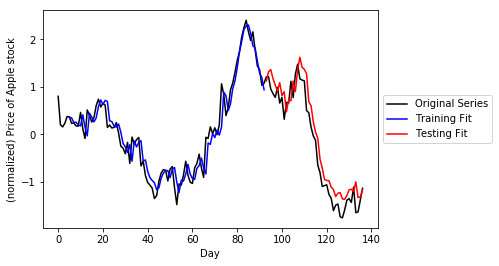

In [19]:

# plot original series
plt.plot(normalized_dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),predict_X_train,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(predict_X_test),1),predict_X_test,color = 'r')

# pretty up graph
plt.xlabel('Day')
plt.ylabel('(normalized) Price of Apple stock')
plt.legend(['Original Series','Training Fit','Testing Fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()